In [84]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import astropy.units as u

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams.update({"text.usetex": True})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
fname = "./47_tuc_nobin_new/NGC0104_sampler.hdf"

In [4]:
mcmcviz_nobin = viz.MCMCVisualizer(fname, obs)
m = mcmcviz_nobin.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)
/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)
/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries

In [5]:
civiz_nobin = mcmcviz_nobin.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.0)

/home/peter/research/GCfit/fitter/visualize/models.py:2168: RuntimeWarning: invalid value encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot
/home/peter/research/GCfit/fitter/visualize/models.py:2168: RuntimeWarning: divide by zero encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot


In [6]:
fname = "./47_tuc_highbin/NGC0104_sampler.hdf"

In [7]:
mcmcviz_highbin = viz.MCMCVisualizer(fname, obs)
m = mcmcviz_highbin.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

In [8]:
civiz_highbin = mcmcviz_highbin.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.1)

/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon]
/home/peter/research/GCfit/fitter/probabilities/mass.py:235: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and wi

In [26]:
med = civiz_highbin.cum_M_Bin.shape[1]//2

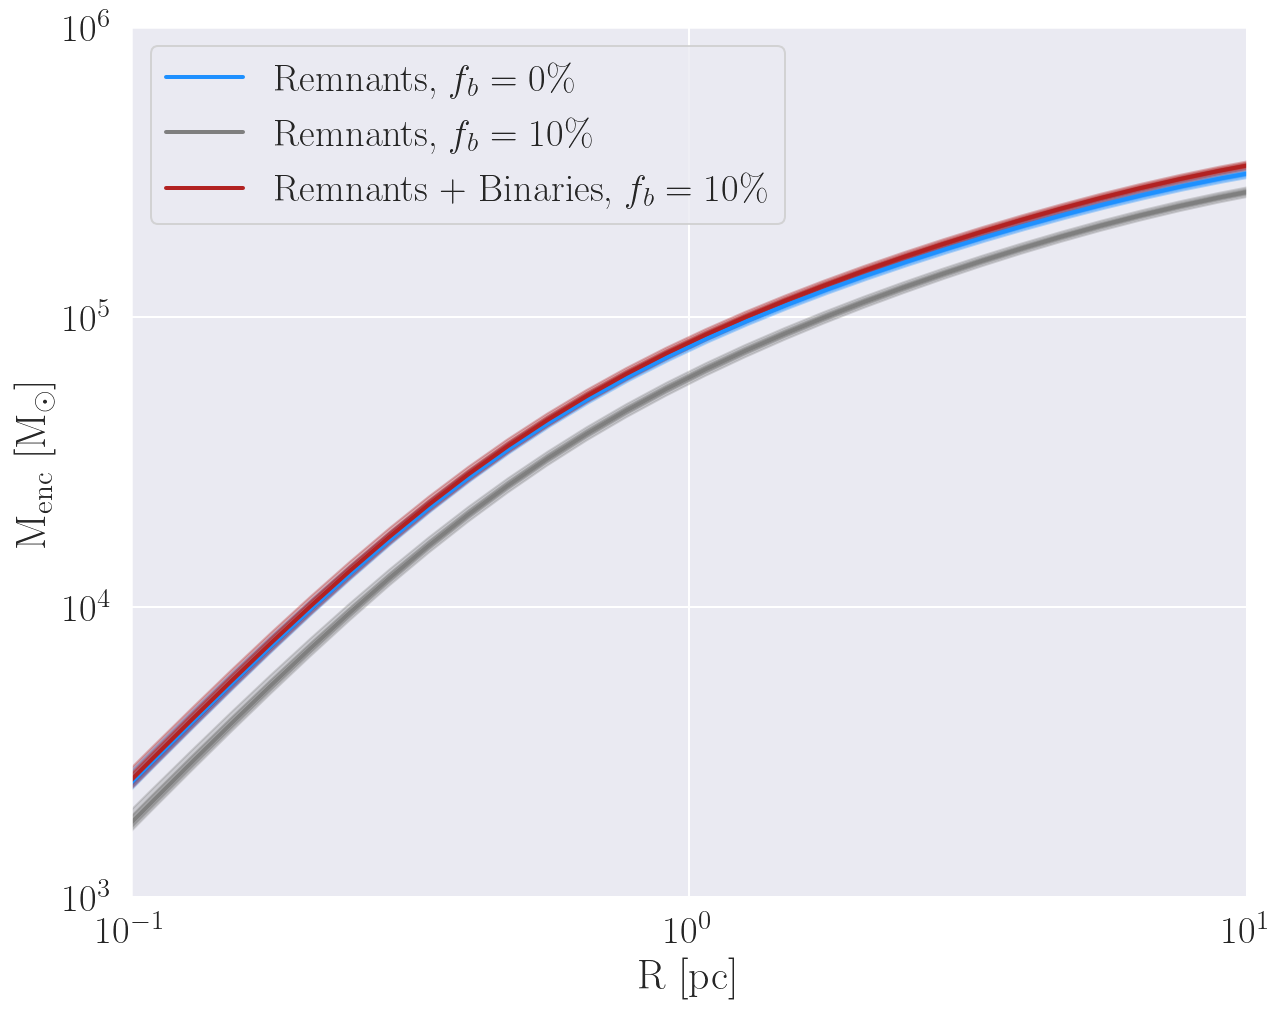

In [89]:
fig = plt.figure(figsize=(10, 8))

ax = plt.gca()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'$\mathrm{M_{{enc}}}$ $[\mathrm{M}_\odot]$')
ax.set_xlabel(r'R [pc]')

plt.xlim(1e-1, 1e1)
plt.ylim(1e3, 1e6)
     

remnants = civiz_nobin.cum_M_BH[0] + civiz_nobin.cum_M_NS[0] + civiz_nobin.cum_M_WD[0]
r = civiz_nobin.r.value
plt.plot(r,remnants[med].value,label="Remnants, $f_b=0\%$",color="dodgerblue",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="dodgerblue",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="dodgerblue",alpha=0.3)

remnants = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0]
r = civiz_highbin.r.value
plt.plot(r,remnants[med].value,label="Remnants, $f_b=10\%$",color="tab:gray",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="tab:gray",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="tab:gray",alpha=0.3)


remnants = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0]
remnants += civiz_highbin.cum_M_Bin[0]
r = civiz_highbin.r.value
plt.plot(r,remnants[med].value,label="Remnants + Binaries, $f_b=10\%$",color="firebrick",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="firebrick",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="firebrick",alpha=0.3)


plt.legend()


fig.savefig("mass_enc_comp.png", bbox_inches="tight", dpi=300)


plt.show()

In [63]:
remnants

<Quantity [[0.00000000e+00, 2.09703184e-05, 2.90568476e-05,
            4.02616868e-05, 5.57873119e-05, 7.72998949e-05,
            1.07108113e-04, 1.48410912e-04, 2.05640806e-04,
            2.84939565e-04, 3.94817336e-04, 5.47065928e-04,
            7.58024280e-04, 1.05033191e-03, 1.45535854e-03,
            2.01657058e-03, 2.79419588e-03, 3.87168714e-03,
            5.36467789e-03, 7.43339186e-03, 1.02998377e-02,
            1.42716344e-02, 1.97750233e-02, 2.74006115e-02,
            3.79667524e-02, 5.26073680e-02, 7.28936347e-02,
            1.01002592e-01, 1.39950767e-01, 1.93917876e-01,
            2.68695347e-01, 3.72307764e-01, 5.15873914e-01,
            7.14799767e-01, 9.90431336e-01, 1.37234457e+00,
            1.90151766e+00, 2.63472551e+00, 3.65062652e+00,
            5.05819240e+00, 7.00838054e+00, 9.71029091e+00,
            1.34535169e+01, 1.86390491e+01, 2.58219675e+01,
            3.57703474e+01, 4.95464011e+01, 6.86181729e+01,
            9.50130759e+01, 1.31527985e+

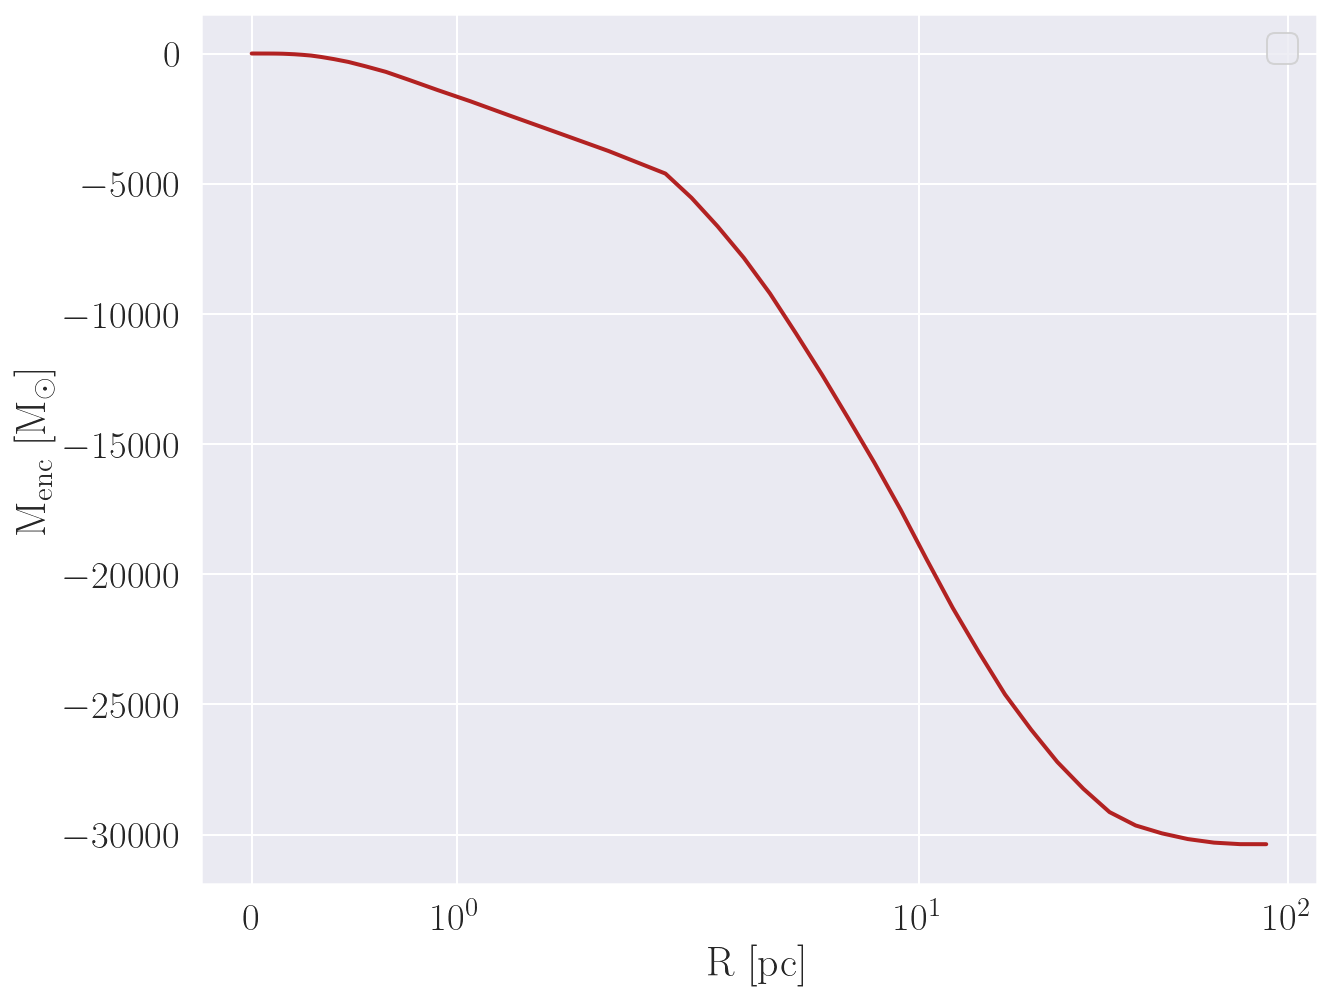

In [95]:
fig = plt.figure(figsize=(10, 8))

ax = plt.gca()
# ax.set_yscale("symlog")
ax.set_xscale("symlog")
ax.set_ylabel(r'$\mathrm{M_{{enc}}}$ $[\mathrm{M}_\odot]$')
ax.set_xlabel(r'R [pc]')

# plt.xlim(1e-1, 1e1)
# plt.ylim(1e3, 1e6)
     

remnants_nobin = civiz_nobin.cum_M_BH[0] + civiz_nobin.cum_M_NS[0] + civiz_nobin.cum_M_WD[0]
   


remnants_highbin = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0] + civiz_highbin.cum_M_Bin[0]

r = civiz_highbin.r.value
plt.plot(r,remnants_nobin[med].value - remnants_highbin[med].value ,label="",color="firebrick",lw=2)        


plt.legend()


# fig.savefig("mass_enc_comp.png", bbox_inches="tight", dpi=300)


plt.show()